![kimson-doan-NmVnsp13JYc-unsplash-min.jpg](./images/kimson-doan-NmVnsp13JYc-unsplash-min.jpg)

# KINGS COUNTY HOUSING PROJECT
## Author: Fred Mutuma

## Overview

For this project, I used regression modeling to analyze house sales in a northwestern county.

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo. The description of the column names can be found in column_names.md in the same folder.

## Business Problem

I have had the King's County house selling records for the last few years. With the data, I want to build a model in which I can use the features in the data about the house to predict the price. In this case, I can guide both the seller and buyer to their business. The seller can use the model to predict the selling price of their house and if they need to do any renovation before selling their home. 

The buyer can have some suggestions about which kind of house they can afford based on their budget. 

The objectives set to achieve the final goal:：

* Analyse and polish the data which have no meaning or is null to the price.
* Remove the features which do not contribute to the house price.
* Check if there are some high correlated features in which some of them can be removed.
* Build the linear regression model.
* Check how the features can contribute to the house change.


## Data Understanding

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo. The description of the column names can be found in column_names.md in the same folder. As with most real world data sets, the column names are not perfectly described, so you'll have to do some research or use your best judgment if you have questions about what the data means.

In [1]:
#Importing the packages necessary for the project
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Import the dataset next to be used check its datatypes, dimensions etc.

In [2]:
#Import the Dataset as a dataframe
df = pd.read_csv('./data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
# describe the Dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


I can now proceed to perfoming some Exploratory Data Analysis but befor that here is a list with a description of all column names.

## Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Exploratory Data Analysis

After checking the dataframe's information we proceed to do some data cleaning and exploratory data an analysis.

### Drop Columns.

In [5]:
#1. Drop all columns that are unnecessary for the project.
df = df.drop(['id', 'sqft_living15', 'sqft_lot15'], axis  = 1)
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

### Change the Date format

In [6]:
#2. Split month and year in the date column into two different columns.
month = []
year = []
for date in df.date:
    month.append(int(date.split('/')[0]))
    year.append(int (date.split('/')[2]))
df['month'] = month
df['year'] = (year)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month,year
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,10,2014
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,12,2014
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2,2015
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,12,2014
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,2,2015


In [7]:
#Drop the old date column
df.drop('date', inplace = True, axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month,year
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,12,2014
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,2,2015


### Dealing with Null Values.

In [8]:
#3. replace all null values with int 0
df.fillna(value = 0, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month,year
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,12,2014
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,2,2015


### Include each property's age.

In [9]:
#4. Convert year built column with the property's age.

df['age_sold'] = df['year'] - df['yr_built']
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month,year,age_sold
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,10,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,12,2014,63
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,12,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,2,2015,28


### Converting Datatypes.

In [10]:
#5. Change column sqft_basement datatype into float

df['sqft_basement'] = [float(x) if x != '?' else 0.0 for x in df['sqft_basement']]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month,year,age_sold
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,10,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,12,2014,63
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,12,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,2,2015,28


### New Columns with more useful data.

In [11]:
#6. Convert the yr_renovated to number of times renovated in the last 30 years
#Two new columns to show number of renovations in the last 10, 20 & 30 years. 
# And another column with total number of renovations at the time of selling.
df['is_renovated'] = [1  if x > 0 else 0 for x in df['yr_renovated']  ]
df['renovated_age'] = df['year'] - df['yr_renovated']
df['renovated_age2'] = [0 if x >1000 else x for x in df['renovated_age']]
df['renovated_10'] = [1 if (x <10) & (x >0)  else 0 for x in df['renovated_age2']]
df['renovated_30'] = [1 if (x <30) & (x >0) else 0 for x in df['renovated_age2']]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,month,year,age_sold,is_renovated,renovated_age,renovated_age2,renovated_10,renovated_30
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,47.5112,-122.257,10,2014,59,0,2014.0,0.0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,47.7210,-122.319,12,2014,63,1,23.0,23.0,0,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,47.7379,-122.233,2,2015,82,0,2015.0,0.0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,47.5208,-122.393,12,2014,49,0,2014.0,0.0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,47.6168,-122.045,2,2015,28,0,2015.0,0.0,0,0


In [12]:
# drop the latest unnecessary columns
df.drop(['yr_renovated','yr_built', 'renovated_age'],axis = 1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,month,year,age_sold,is_renovated,renovated_age2,renovated_10,renovated_30
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,98178,47.5112,-122.257,10,2014,59,0,0.0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,98125,47.7210,-122.319,12,2014,63,1,23.0,0,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,98028,47.7379,-122.233,2,2015,82,0,0.0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,98136,47.5208,-122.393,12,2014,49,0,0.0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,98074,47.6168,-122.045,2,2015,28,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,...,98103,47.6993,-122.346,5,2014,5,0,0.0,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,...,98146,47.5107,-122.362,2,2015,1,0,0.0,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,...,98144,47.5944,-122.299,6,2014,5,0,0.0,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,...,98027,47.5345,-122.069,1,2015,11,0,0.0,0,0


### Trimming the Zipcode.

In [13]:
#7. Trim the zipcode to 4 digits.
df.zipcode = [int(x/10) for x in df.zipcode ]

### Identify and deal with Outliers.

In [14]:
# First, explore the number of unique characters in each column.
# This is to help with identifying outliers and remove them.
df.nunique(axis = 0)

price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             19
lat               5033
long               751
month               12
year                 2
age_sold           117
is_renovated         2
renovated_age       72
renovated_age2      70
renovated_10         2
renovated_30         2
dtype: int64

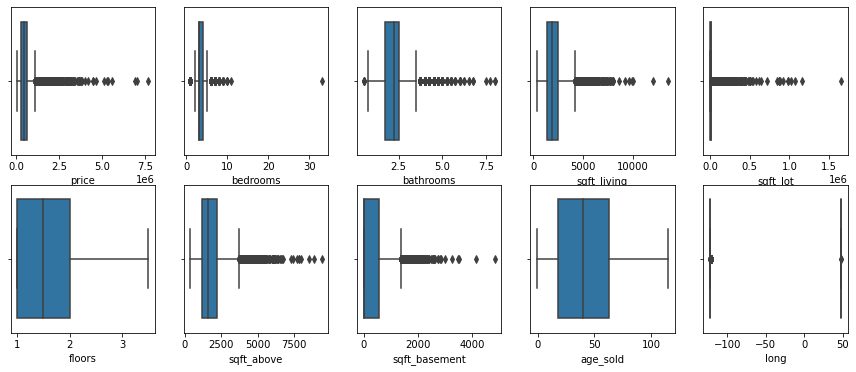

In [15]:
#plot the columns with more than single digits count.
fig, axs = plt.subplots(2,5, figsize = (15,6))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['bedrooms'], ax = axs[0,1])
plt3 = sns.boxplot(df['bathrooms'], ax = axs[0,2])
plt4 = sns.boxplot(df['sqft_living'], ax = axs[0,3])
plt5 = sns.boxplot(df['sqft_lot'], ax = axs[0,4])
plt1 = sns.boxplot(df['floors'], ax = axs[1,0])
plt2 = sns.boxplot(df['sqft_above'], ax = axs[1,1])
plt3 = sns.boxplot(df['sqft_basement'], ax = axs[1,2])
plt4 = sns.boxplot(df['age_sold'], ax = axs[1,3])
plt4 = sns.boxplot(df['lat'])
plt4 = sns.boxplot(df['long'])
plt.savefig('./images/fig1.png')

In [16]:
#One can identify outliers from the boxplots above
#The above figures show that there are multipal columns contain some outlier data. 
#I then collected all the columns and remove them 
to_modify = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above','sqft_basement', 'lat', 'long']
for col in to_modify:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

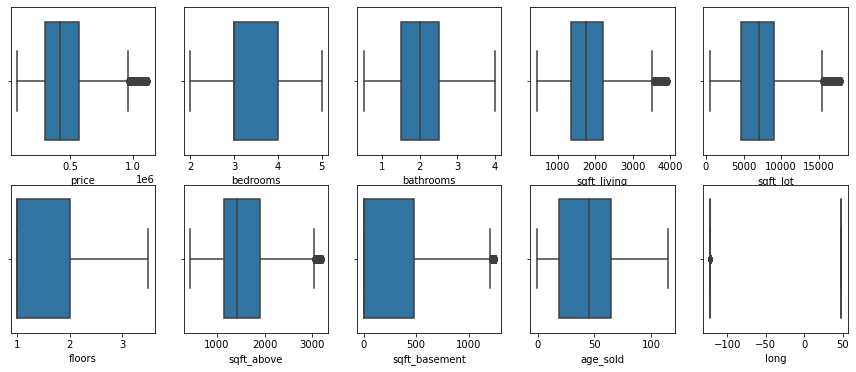

In [17]:
#Plot them again to check the results
# check the data after modification
fig, axs = plt.subplots(2,5, figsize = (15,6))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['bedrooms'], ax = axs[0,1])
plt3 = sns.boxplot(df['bathrooms'], ax = axs[0,2])
plt4 = sns.boxplot(df['sqft_living'], ax = axs[0,3])
plt5 = sns.boxplot(df['sqft_lot'], ax = axs[0,4])
plt1 = sns.boxplot(df['floors'], ax = axs[1,0])
plt2 = sns.boxplot(df['sqft_above'], ax = axs[1,1])
plt3 = sns.boxplot(df['sqft_basement'], ax = axs[1,2])
plt4 = sns.boxplot(df['age_sold'], ax = axs[1,3])
plt4 = sns.boxplot(df['lat'])
plt4 = sns.boxplot(df['long'])
plt.savefig('./images/fig2.png')

### Relationship Between Price and other Columns.

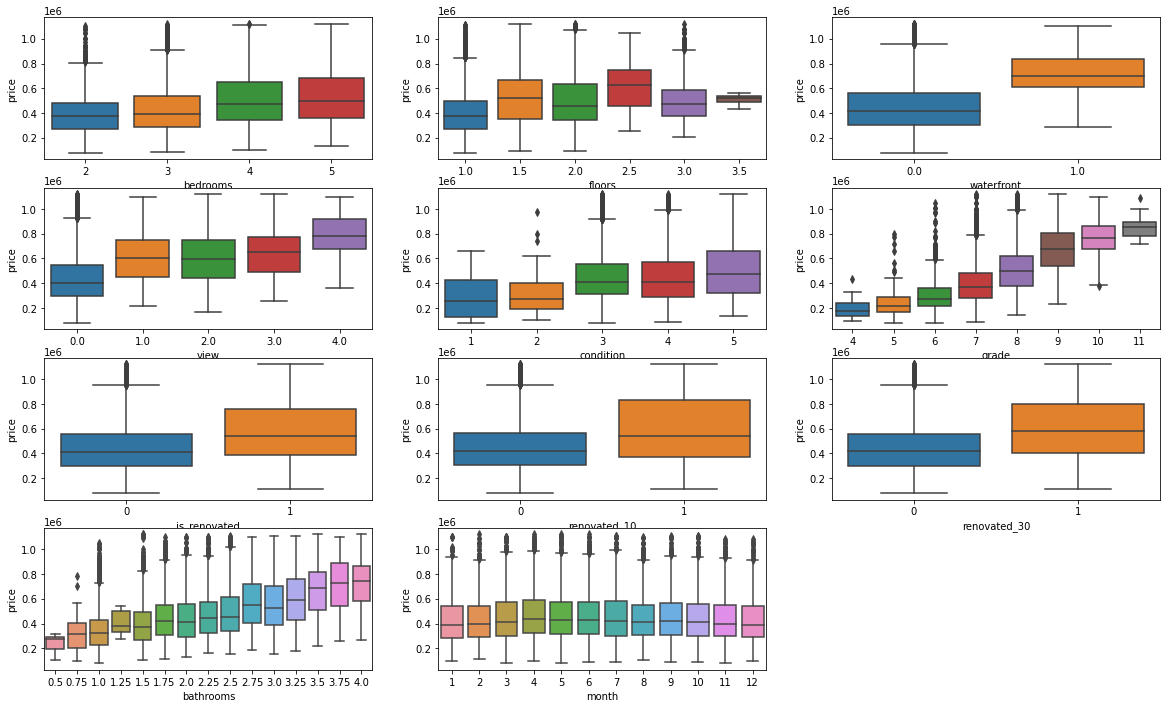

<Figure size 432x288 with 0 Axes>

In [18]:
#  In order to check the relationship between the price with most of the columns with few unique numbers, 
# I plot their relations in seperate  boxplot figures.
plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'bedrooms', y = 'price', data = df)
plt.subplot(4,3,2)
sns.boxplot(x = 'floors', y = 'price', data = df)
plt.subplot(4,3,3)
sns.boxplot(x = 'waterfront', y = 'price', data = df)
plt.subplot(4,3,4)
sns.boxplot(x = 'view', y = 'price', data = df)
plt.subplot(4,3,5)
sns.boxplot(x = 'condition', y = 'price', data = df)
plt.subplot(4,3,6)
sns.boxplot(x = 'grade', y = 'price', data = df)
plt.subplot(4,3,7)

sns.boxplot(x = 'is_renovated', y = 'price', data = df)
plt.subplot(4,3,8)
sns.boxplot(x = 'renovated_10', y = 'price', data = df)
plt.subplot(4,3,9)
sns.boxplot(x = 'renovated_30', y = 'price', data = df)
plt.subplot(4,3,10)
sns.boxplot(x = 'bathrooms', y = 'price', data = df)
plt.subplot(4,3,11)

sns.boxplot(x = 'month', y = 'price', data = df)
plt.show()
plt.savefig('./images/fig3.png')

You can noew clearly see the distribution of prices within different features in the dataset.

### Correlation.

In [19]:
#check unique values again
df.nunique()

price             3027
bedrooms             4
bathrooms           15
sqft_living        669
sqft_lot          6905
floors               6
waterfront           2
view                 5
condition            5
grade                8
sqft_above         599
sqft_basement      162
yr_built           116
yr_renovated        66
zipcode             19
lat               4696
long               517
month               12
year                 2
age_sold           117
is_renovated         2
renovated_age       66
renovated_age2      64
renovated_10         2
renovated_30         2
dtype: int64

In [20]:
#I filtered the features and find the pair of features with correlation value between 0.75 and 1.
# I tested the pairs of feature with correlation more than 0.75.
df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending = False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.set_index(['pairs'], inplace = True)
df_corr.drop(columns = ['level_0', "level_1"], inplace  = True)
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace = True)
df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

,cc
pairs,
"(renovated_age, yr_renovated)",0.999999
"(yr_renovated, is_renovated)",0.999965
"(is_renovated, renovated_age)",0.999964
"(age_sold, yr_built)",0.999876
"(sqft_above, sqft_living)",0.821909
"(yr_renovated, renovated_30)",0.811558
"(renovated_age, renovated_30)",0.811547
"(renovated_30, is_renovated)",0.809428
"(month, year)",0.785969


In [21]:
#I need to remove at least one of the features in each pair. 
#Comparing the last list, I decided to delete the columns sqft_above, renovated_30, year.

df.drop([ 'sqft_above', 'renovated_30',  'year', 'yr_renovated','yr_built', 'renovated_age'], axis  = 1, inplace = True )
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,month,age_sold,is_renovated,renovated_age2,renovated_10
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0.0,9817,47.5112,-122.257,10,59,0,0.0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,9812,47.7210,-122.319,12,63,1,23.0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0.0,9802,47.7379,-122.233,2,82,0,0.0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910.0,9813,47.5208,-122.393,12,49,0,0.0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,9807,47.6168,-122.045,2,28,0,0.0,0


### Columns with few Unique Values.

In [22]:
# check number of unique values in each column.
df.nunique()

price             3027
bedrooms             4
bathrooms           15
sqft_living        669
sqft_lot          6905
floors               6
waterfront           2
view                 5
condition            5
grade                8
sqft_basement      162
zipcode             19
lat               4696
long               517
month               12
age_sold           117
is_renovated         2
renovated_age2      64
renovated_10         2
dtype: int64

In [23]:
# Modify columns with  a few unique records.
mod = ['bedrooms','bathrooms', 'floors' ,'view','condition','grade', 'zipcode','month',]
df_two = pd.DataFrame()
for col in mod:
    df_two = pd.concat([df_two, pd.get_dummies(df[col], prefix = col)], axis = 1)
df_two.head()

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#For the columns with only 2 unique numbers, I did the drop_first when using dummies.
mod_2 = ['waterfront','is_renovated','renovated_10']
df_three = pd.DataFrame()
for col in mod_2:
    df_three = pd.concat([df_three, pd.get_dummies(df[col], prefix = col, drop_first=True)], axis = 1)
df_three.head()

,waterfront_1.0,is_renovated_1,renovated_10_1
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,0


In [25]:
# I then dropped the catalized columns and concat the new features.
df = df.drop(mod, axis  = 1 )
df = df.drop(mod_2, axis  = 1 )
df = pd.concat([df, df_two, df_three], axis = 1)
df.head()

,price,sqft_living,sqft_lot,sqft_basement,lat,long,age_sold,renovated_age2,bedrooms_2,bedrooms_3,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,waterfront_1.0,is_renovated_1,renovated_10_1
0,221900.0,1180,5650,0.0,47.5112,-122.257,59,0.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,2570,7242,400.0,47.7210,-122.319,63,23.0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,180000.0,770,10000,0.0,47.7379,-122.233,82,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,910.0,47.5208,-122.393,49,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,510000.0,1680,8080,0.0,47.6168,-122.045,28,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Regression.

I am now done with the EDA part. Now I can proceed to split the data to trainning and testing parts to do the fitting.


In [26]:
#split the data to training and testing part
from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop('price', axis  = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

12360 4121 12360 4121


Then, proceed to build a regression model.

### Build a Model with All Numeric Features.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

baseline_model = LinearRegression()


splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
model = LinearRegression()

model_scores = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", model_scores["train_score"].mean())
print("Validation score:", model_scores["test_score"].mean())
print()

Current Model
Train score:      0.7240899617017256
Validation score: 0.7287778247252804



The model got good scores on the training data, and better scores on the validation data. However, I still want to continue to check how each feature work in general. Then I choose to check the coef value of the regression.

### Select the Best Combination of Features.

Since there is a lot of features, I tried to check if there is some features can be removed. Then, I tried to selecting Features with sklearn.feature_selection.

In [28]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living: True
sqft_lot: True
sqft_basement: True
lat: True
long: True
age_sold: True
renovated_age2: True
bedrooms_2: True
bedrooms_3: True
bedrooms_4: True
bedrooms_5: True
bathrooms_0.5: True
bathrooms_0.75: True
bathrooms_1.0: True
bathrooms_1.25: True
bathrooms_1.5: True
bathrooms_1.75: True
bathrooms_2.0: True
bathrooms_2.25: True
bathrooms_2.5: True
bathrooms_2.75: True
bathrooms_3.0: True
bathrooms_3.25: True
bathrooms_3.5: True
bathrooms_3.75: True
bathrooms_4.0: True
floors_1.0: True
floors_1.5: True
floors_2.0: True
floors_2.5: True
floors_3.0: True
floors_3.5: True
view_0.0: True
view_1.0: True
view_2.0: True
view_3.0: True
view_4.0: True
condition_1: True
condition_2: True
condition_3: True
condition_4: True
condition_5: True
grade_4: True
grade_5: True
grade_6: True
grade_7: True
grade_8: True
grade_9: True
grade_10: True
grade_11: True
zipcode_9800: True
zipcode_9801: True
zipcode_9802: True
zipcode_9803: True
zipcode_9804: True
zipcode_9805: 

From the results, all columns will be necesary for regression.

### Linear Regression with OLS.

In [29]:
#linear rgression with OlS.
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     428.2
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:35:04   Log-Likelihood:            -1.5990e+05
No. Observations:               12360   AIC:                         3.200e+05
Df Residuals:                   12283   BIC:                         3.205e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.916e+06   7.95e+05     -6.184      0.000   -6.47e+06   -3.36e+06
sqft_living      116.5640      3.168     36.796      0.000     110.355     122.773
sqft_lot          -2.3239      0.375     -6.198      0.000      -3.059      -1.589
sqft_basement    -22.0997      3.793     -5.827      0.000     -29.534     -14.665
lat             6.295e+05   8477.313     74.259      0.000    6.13e+05    6.46e+05
long            1.565e+05   1.32e+04     11.831      0.000    1.31e+05    1.82e+05
age_sold        1303.9777     56.968     22.890      0.000    1192.311    1415.644
renovated_age2 -1830.5484    369.867     -4.949      0.000   -2555.546   -1105.551
bedrooms_2     -1.215e+06   1.99e+05     -6.113      0.000    -1.6e+06   -8.25e+05
bedrooms_3     -1.222e+06   1.99e+05     -6.146      0.000   -1.61e+06   -8.32e+05
bedrooms_4      -1.23e+06   1.99e+05     -6.186      0.000   -1.62e+06    -8.4e+05
bedrooms_5      -1.25e+06   1.99e+05     -6.288      0.000   -1.64e+06    -8.6e+05
bathrooms_0.5  -3.966e+05    7.6e+04     -5.215      0.000   -5.46e+05   -2.48e+05
bathrooms_0.75 -3.243e+05   5.76e+04     -5.628      0.000   -4.37e+05   -2.11e+05
bathrooms_1.0  -3.486e+05   5.34e+04     -6.530      0.000   -4.53e+05   -2.44e+05
bathrooms_1.25   -4.1e+05   6.56e+04     -6.250      0.000   -5.39e+05   -2.81e+05
bathrooms_1.5  -3.445e+05   5.34e+04     -6.451      0.000   -4.49e+05    -2.4e+05
bathrooms_1.75  -3.38e+05   5.34e+04     -6.333      0.000   -4.43e+05   -2.33e+05
bathrooms_2.0  -3.342e+05   5.32e+04     -6.277      0.000   -4.39e+05    -2.3e+05
bathrooms_2.25 -3.312e+05   5.34e+04     -6.201      0.000   -4.36e+05   -2.26e+05
bathrooms_2.5  -3.308e+05   5.33e+04     -6.212      0.000   -4.35e+05   -2.26e+05
bathrooms_2.75 -3.164e+05   5.34e+04     -5.921      0.000   -4.21e+05   -2.12e+05
bathrooms_3.0  -3.251e+05   5.35e+04     -6.071      0.000    -4.3e+05    -2.2e+05
bathrooms_3.25 -3.096e+05   5.37e+04     -5.764      0.000   -4.15e+05   -2.04e+05
bathrooms_3.5  -2.932e+05   5.38e+04     -5.454      0.000   -3.99e+05   -1.88e+05
bathrooms_3.75  -2.72e+05   5.72e+04     -4.751      0.000   -3.84e+05    -1.6e+05
bathrooms_4.0  -2.413e+05   5.83e+04     -4.136      0.000   -3.56e+05   -1.27e+05
floors_1.0     -8.229e+05   1.33e+05     -6.203      0.000   -1.08e+06   -5.63e+05
floors_1.5     -8.125e+05   1.33e+05     -6.129      0.000   -1.07e+06   -5.53e+05
floors_2.0     -8.148e+05   1.33e+05     -6.149      0.000   -1.07e+06   -5.55e+05
floors_2.5      -7.94e+05   1.33e+05     -5.977      0.000   -1.05e+06   -5.34e+05
floors_3.0     -8.313e+05   1.33e+05     -6.245      0.000   -1.09e+06    -5.7e+05
floors_3.5     -8.403e+05   1.37e+05     -6.121      0.000   -1.11e+06   -5.71e+05
view_0.0        -1.07e+06   1.59e+05     -6.731      0.000   -1.38e+06   -7.58e+05
view_1.0    

### Results.

The Coefficient of all the features show how each of the feature affect the house price. Briefly, for the house size, the sqft_living had value 114.5637 which suggests that increasing 1 sqrt of living area, the house pirce will increase $116.56. 

However, the sqft_lot and sqft_basement had negtive correlation to the house price even though the correlation value is very low compare to sqft_living. The number of bedrooms had negtive negtive correlation to the house price. 

More bathrooms, floors, views and conditions will increase the house price in general. Grades increase the house price a lot each level though still negative. To the zipcode, the house in some area is much higer than others. The house price in month February to July is obviously higher than other months. If there is a waterfront, the house price will increase by 161000. If the house is renovated, the house price can increasing around 72000. If the renovated is within 10 years, the house price can increase around 169000.

## Validate the final model.

In [30]:
# Base on the train score and validation score, the best columns until now is the third model. 

X_train_final = X_train
X_test_final = X_test

final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.7164100279537994

In [31]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     428.2
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:35:04   Log-Likelihood:            -1.5990e+05
No. Observations:               12360   AIC:                         3.200e+05
Df Residuals:                   12283   BIC:                         3.205e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.916e+06   7.95e+05     -6.184      0.000   -6.47e+06   -3.36e+06
sqft_living      116.5640      3.168     36.796      0.000     110.355     122.773
sqft_lot          -2.3239      0.375     -6.198      0.000      -3.059      -1.589
sqft_basement    -22.0997      3.793     -5.827      0.000     -29.534     -14.665
lat             6.295e+05   8477.313     74.259      0.000    6.13e+05    6.46e+05
long            1.565e+05   1.32e+04     11.831      0.000    1.31e+05    1.82e+05
age_sold        1303.9777     56.968     22.890      0.000    1192.311    1415.644
renovated_age2 -1830.5484    369.867     -4.949      0.000   -2555.546   -1105.551
bedrooms_2     -1.215e+06   1.99e+05     -6.113      0.000    -1.6e+06   -8.25e+05
bedrooms_3     -1.222e+06   1.99e+05     -6.146      0.000   -1.61e+06   -8.32e+05
bedrooms_4      -1.23e+06   1.99e+05     -6.186      0.000   -1.62e+06    -8.4e+05
bedrooms_5      -1.25e+06   1.99e+05     -6.288      0.000   -1.64e+06    -8.6e+05
bathrooms_0.5  -3.966e+05    7.6e+04     -5.215      0.000   -5.46e+05   -2.48e+05
bathrooms_0.75 -3.243e+05   5.76e+04     -5.628      0.000   -4.37e+05   -2.11e+05
bathrooms_1.0  -3.486e+05   5.34e+04     -6.530      0.000   -4.53e+05   -2.44e+05
bathrooms_1.25   -4.1e+05   6.56e+04     -6.250      0.000   -5.39e+05   -2.81e+05
bathrooms_1.5  -3.445e+05   5.34e+04     -6.451      0.000   -4.49e+05    -2.4e+05
bathrooms_1.75  -3.38e+05   5.34e+04     -6.333      0.000   -4.43e+05   -2.33e+05
bathrooms_2.0  -3.342e+05   5.32e+04     -6.277      0.000   -4.39e+05    -2.3e+05
bathrooms_2.25 -3.312e+05   5.34e+04     -6.201      0.000   -4.36e+05   -2.26e+05
bathrooms_2.5  -3.308e+05   5.33e+04     -6.212      0.000   -4.35e+05   -2.26e+05
bathrooms_2.75 -3.164e+05   5.34e+04     -5.921      0.000   -4.21e+05   -2.12e+05
bathrooms_3.0  -3.251e+05   5.35e+04     -6.071      0.000    -4.3e+05    -2.2e+05
bathrooms_3.25 -3.096e+05   5.37e+04     -5.764      0.000   -4.15e+05   -2.04e+05
bathrooms_3.5  -2.932e+05   5.38e+04     -5.454      0.000   -3.99e+05   -1.88e+05
bathrooms_3.75  -2.72e+05   5.72e+04     -4.751      0.000   -3.84e+05    -1.6e+05
bathrooms_4.0  -2.413e+05   5.83e+04     -4.136      0.000   -3.56e+05   -1.27e+05
floors_1.0     -8.229e+05   1.33e+05     -6.203      0.000   -1.08e+06   -5.63e+05
floors_1.5     -8.125e+05   1.33e+05     -6.129      0.000   -1.07e+06   -5.53e+05
floors_2.0     -8.148e+05   1.33e+05     -6.149      0.000   -1.07e+06   -5.55e+05
floors_2.5      -7.94e+05   1.33e+05     -5.977      0.000   -1.05e+06   -5.34e+05
floors_3.0     -8.313e+05   1.33e+05     -6.245      0.000   -1.09e+06    -5.7e+05
floors_3.5     -8.403e+05   1.37e+05     -6.121      0.000   -1.11e+06   -5.71e+05
view_0.0        -1.07e+06   1.59e+05     -6.731      0.000   -1.38e+06   -7.58e+05
view_1.0    

The coefficients of the selected features shows that the sqft_living is the most important features which affected the house price since the sqft_living is normally more than 1000. Both sqft_lot and sqft_basement columns are least affected given that they are negtive numbers too. The effect of grade on the house is very big also. Also, if the house is renovated within 10 years, the price will increase by around 17000 dollars. If there is a waterfront, the price of the house will increase dramtically with 161690 dollars.


### Importing the MSE to Check the MSE Value.

In [32]:
# import the mean_squared_error to check the mean_squared_error value
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

102976.21776622928

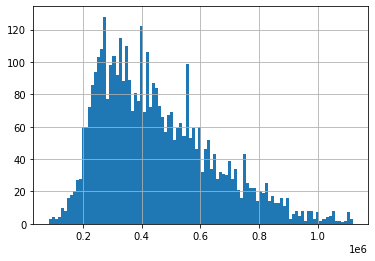

In [33]:
#check the distribution of price in test data
y_test.hist(bins = 100)
y_test.mean()
plt.savefig('./images/fig4.png')

The mse value is 102976. The mean of the price is 452593.

This means that for an average house price, this algorithm will be off by about 102976 thousands. Given that the mean value of house price is 452593, the algorithm can patially set the price. However, we still want to have a validation and adjust these prices rather than just allowing the algorithm to set them.

### The validation.

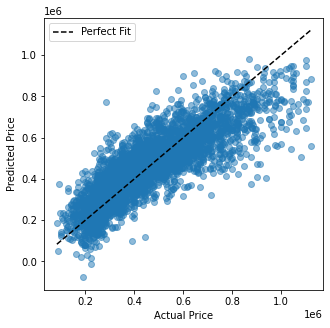

In [34]:
# For the validation, I first plot the scatter plot of Predicted Price vs the Actual Price
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots(figsize =(5,5))

perfect_line = np.arange(y_test.min(), y_test.max())

ax.plot(perfect_line,perfect_line, linestyle="--", color="black", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();
plt.savefig('./images/fig5.png')

###  qqplot.

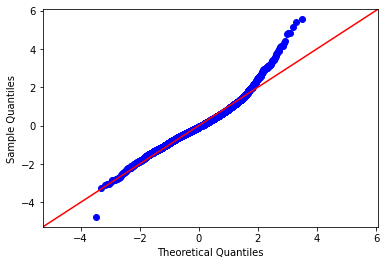

In [35]:
#test the residuals by qqplot
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
plt.savefig('./images/fig6.png')

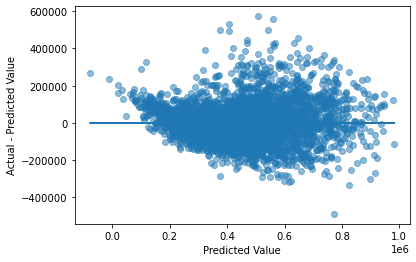

In [36]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");
plt.savefig('./images/fig7.png')

The validation of prediction and real data shows that the prediction price for most house whose price is low (20% - 40% of the max price) is close to the real price. 
The qqplot shows that the house price is well predicted when the house price is not very high. However, for the high value price house, the prediction is not very acturate. There is a lot of shift of prediction price when the house value increase especialy when house price is more than 200000.


## Conclusion.

The Coefficient of all the features show how each of the feature affect the house price. Briefly, for the house size, the sqft_living had value 116.5640	 which suggests that increasing 1 sqrt of living area, the house pirce will increase 116 dollars. However, the sqft_lot and sqft_basement had negtive correlation to the house price even though the correlation value is very low compare to sqft_living. The number of bedrooms had negtive negtive correlation to the house price. More bathrooms, floors, views and conditions will increase the house price in general. Grades increase the house price a lot each level though still negative. To the zipcode, the house in some area is much higer than others. The house price in month February to July is obviously higher than other months. If there is a waterfront, the house price will increase by 161000. If the house is renovated, the house price can increasing around 72000. If the renovated is within 10 years, the house price can increase around 169000.

## Recommendation.
To the buyer, We had our prediction model which can predict the house price and give buyer some suggestion about the price they want. However, the predicted house price is higher than the selling price when the price is over 750000. To the seller, our model give them some suggestion how to increase the potential selling value. For example, they can try to renovate the house and make water front if possible and increas the grade of the house.